Load a pretrained CNN (like ResNet18).

Feed a sample image into it.
Visualize the outputs of the early convolution layers (feature maps).
Let’s begin with code to load image + pretrained model + hook feature maps:

In [18]:
import torch

import torchvision.models as models

import torchvision.transforms as transforms

from PIL import Image

import matplotlib.pyplot as plt

In [19]:
# Load pretrained model (ResNet18)

model = models.resnet18(pretrained= True)

model.eval()

/opt/anaconda3/envs/masterxdl/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/envs/masterxdl/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [20]:
# Load and preprocess image

img_url = "https://upload.wikimedia.org/wikipedia/commons/7/7d/Dog_face.png"

from urllib.request import urlopen

img = Image.open(urlopen(img_url))


transform = transforms.Compose([

        transforms.Resize((224,224)),

        transforms.ToTensor()

])


img_tensor = transform(img).unsqueeze(0)

In [21]:
# Hook to capture feature maps from the first conv layer


feature_maps = []

def hook_fn(module, input, output):

    feature_maps.append(output)


hook = model.conv1.register_forward_hook(hook_fn)

In [22]:
# Run the image through the model

_ = model(img_tensor)

In [23]:
# Remove hook

hook.remove()

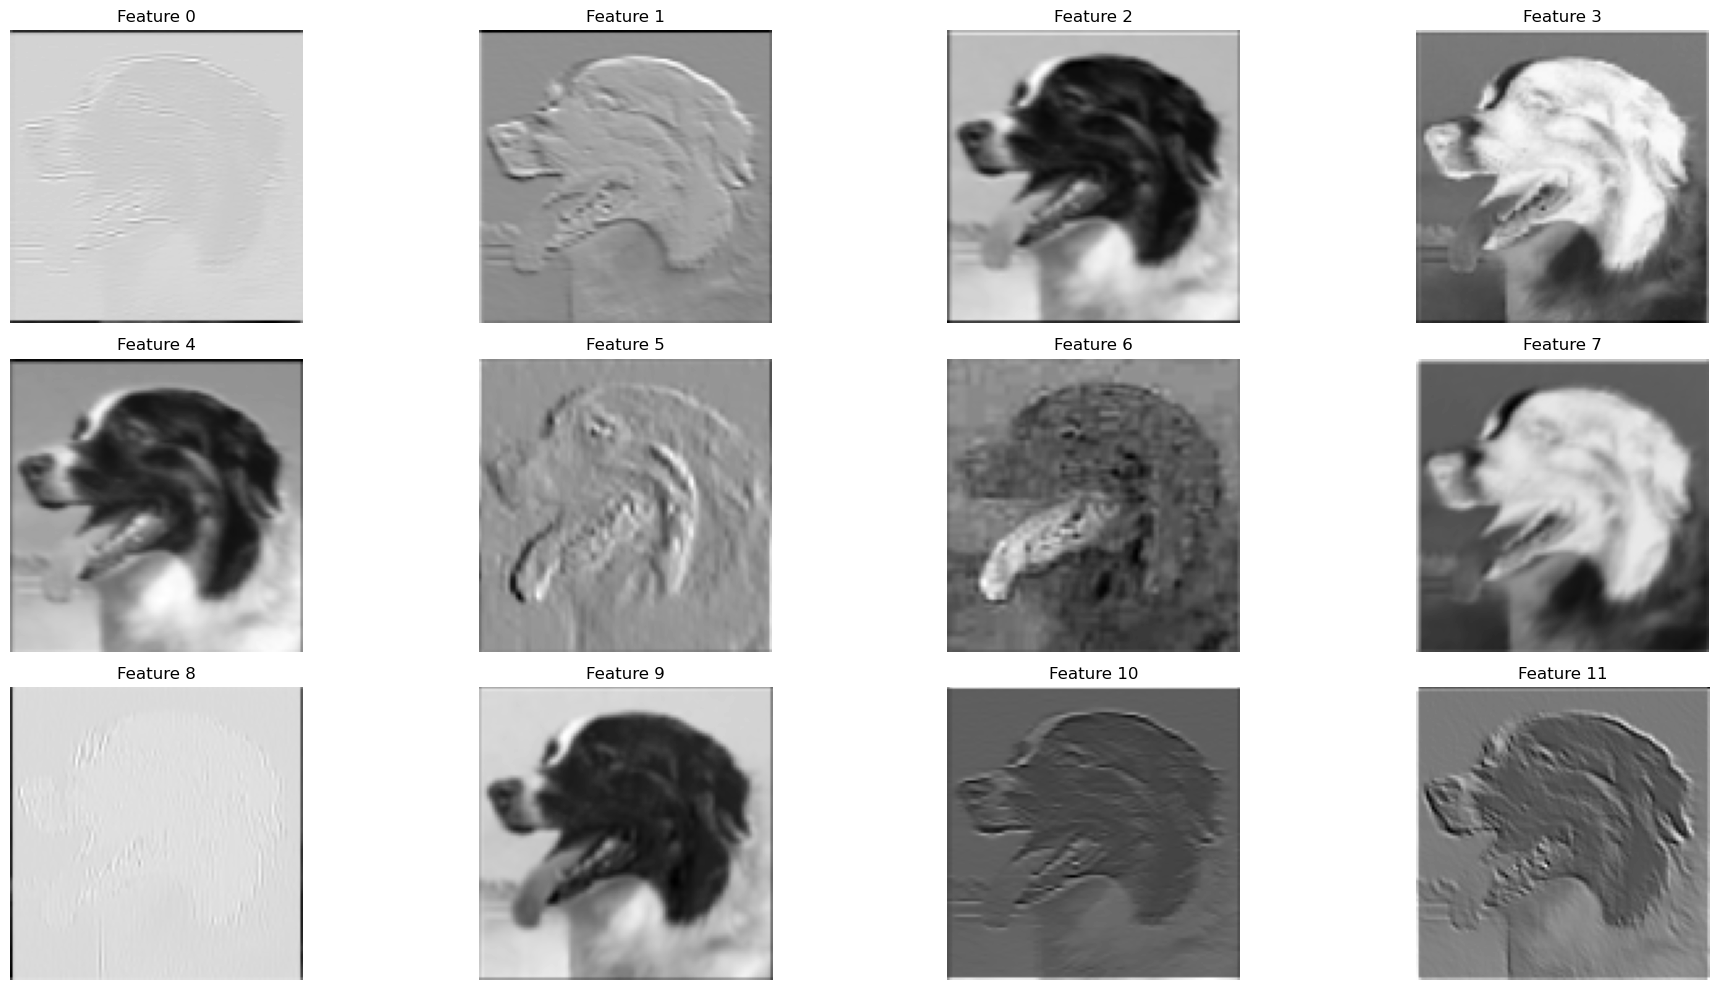

In [24]:
# Visualize some of the feature maps

feature_map = feature_maps [0] [0] # First image in batch

plt.figure(figsize=(20,10))

for i in range(12):  # Show first 12 feature maps

    plt.subplot(3, 4, i+1)

    plt.imshow(feature_map[i].detach(), cmap='gray')

    plt.axis('off')

    plt.title(f'Feature {i}')

plt.tight_layout()

plt.show()